<div style="background: linear-gradient(to right, #FFB6B6, #FFD700); padding: 20px 50px; border-radius: 10px; text-align: center;">
    <img src="LOGO-png1.png" alt="Logo" style="max-width: 200px; margin: 0; display: block; margin-left: auto; margin-right: auto;">
    <h1 style="font-family: 'Brush Script MT', cursive; font-size: 64px; color: white; margin-top: 10px;">
        <span style="color: #007a5f;">Sham</span><span style="color: #fd8d08;">Soon</span>
    </h1>
</div>

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Import Scripts:
    </h2>
</div>

In [1]:

# Import scripts
from data_loading import load_dataset
from model_building import build_model
from model2_building import build_smaller_model
from model_training import train_model
from utils import plot_training_history, evaluate_model, visualize_predictions , predict_image_class
from fine_tuning import fine_tune_model
from fine_tuning2 import fine_tune_model

In [2]:
# Configuration
IMG_HEIGHT = 244
IMG_WIDTH = 244
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
DATA_DIR = "/kaggle/input/faulty-solar-panel-images/Faulty_solar_panel"

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color:#007a5f; margin: 0;">
        Load Data:
    </h2>
</div>


In [3]:

# Load the dataset
train_ds, val_ds = load_dataset(DATA_DIR, IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE)

Found 4372 files belonging to 6 classes.
Using 3498 files for training.
Found 4372 files belonging to 6 classes.
Using 874 files for validation.


In [4]:
# Get class names
CLASS_NAMES = train_ds.class_names
print("Class names:", CLASS_NAMES)

Class names: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Modeling:
    </h2>
</div>

# MobileNetV2 Model

In [5]:

# Build the model
model = build_smaller_model(IMG_HEIGHT, IMG_WIDTH, len(CLASS_NAMES))
model.summary()

/kaggle/working/model2_building.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           7,686 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
# Train the model
EPOCHS = 15
print("Training the model...")
history = train_model(model, train_ds, val_ds, EPOCHS)

Training the model...
Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 27s 155ms/step - accuracy: 0.3910 - loss: 1.5951 - val_accuracy: 0.7723 - val_loss: 0.6815
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.7391 - loss: 0.7475 - val_accuracy: 0.8364 - val_loss: 0.5238
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7860 - loss: 0.6004 - val_accuracy: 0.8535 - val_loss: 0.4633
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.8316 - loss: 0.5074 - val_accuracy: 0.8524 - val_loss: 0.4450
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8504 - loss: 0.4392 - val_accuracy: 0.8776 - val_loss: 0.3930
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8584 - loss: 0.4098 - val_accuracy: 0.8787 - val_loss: 0.3777
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.8616 - loss: 0.3906 - val_accuracy: 0.8822 - val_loss: 0.3610
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.8670 -

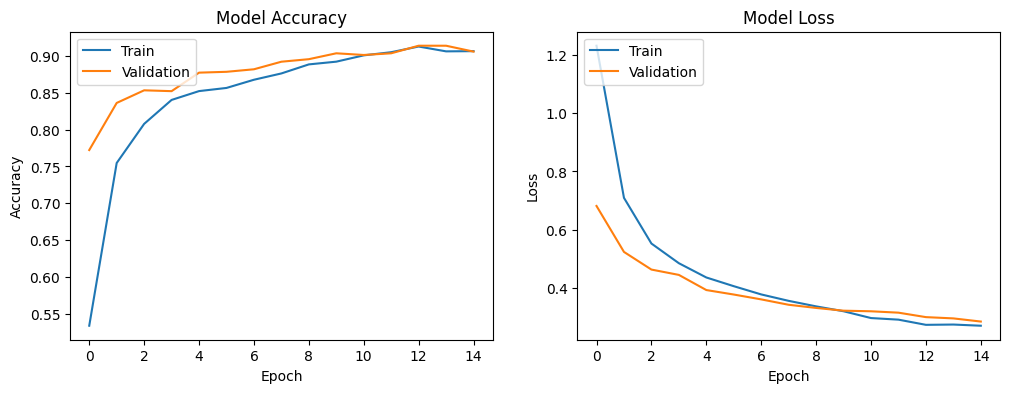

In [7]:
# Plot training history
plot_training_history(history)

In [8]:
# Evaluate model
evaluate_model(model, val_ds)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9093 - loss: 0.2840
Validation Loss: 0.284960001707077
Validation Accuracy: 0.9061784744262695


(0.284960001707077, 0.9061784744262695)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


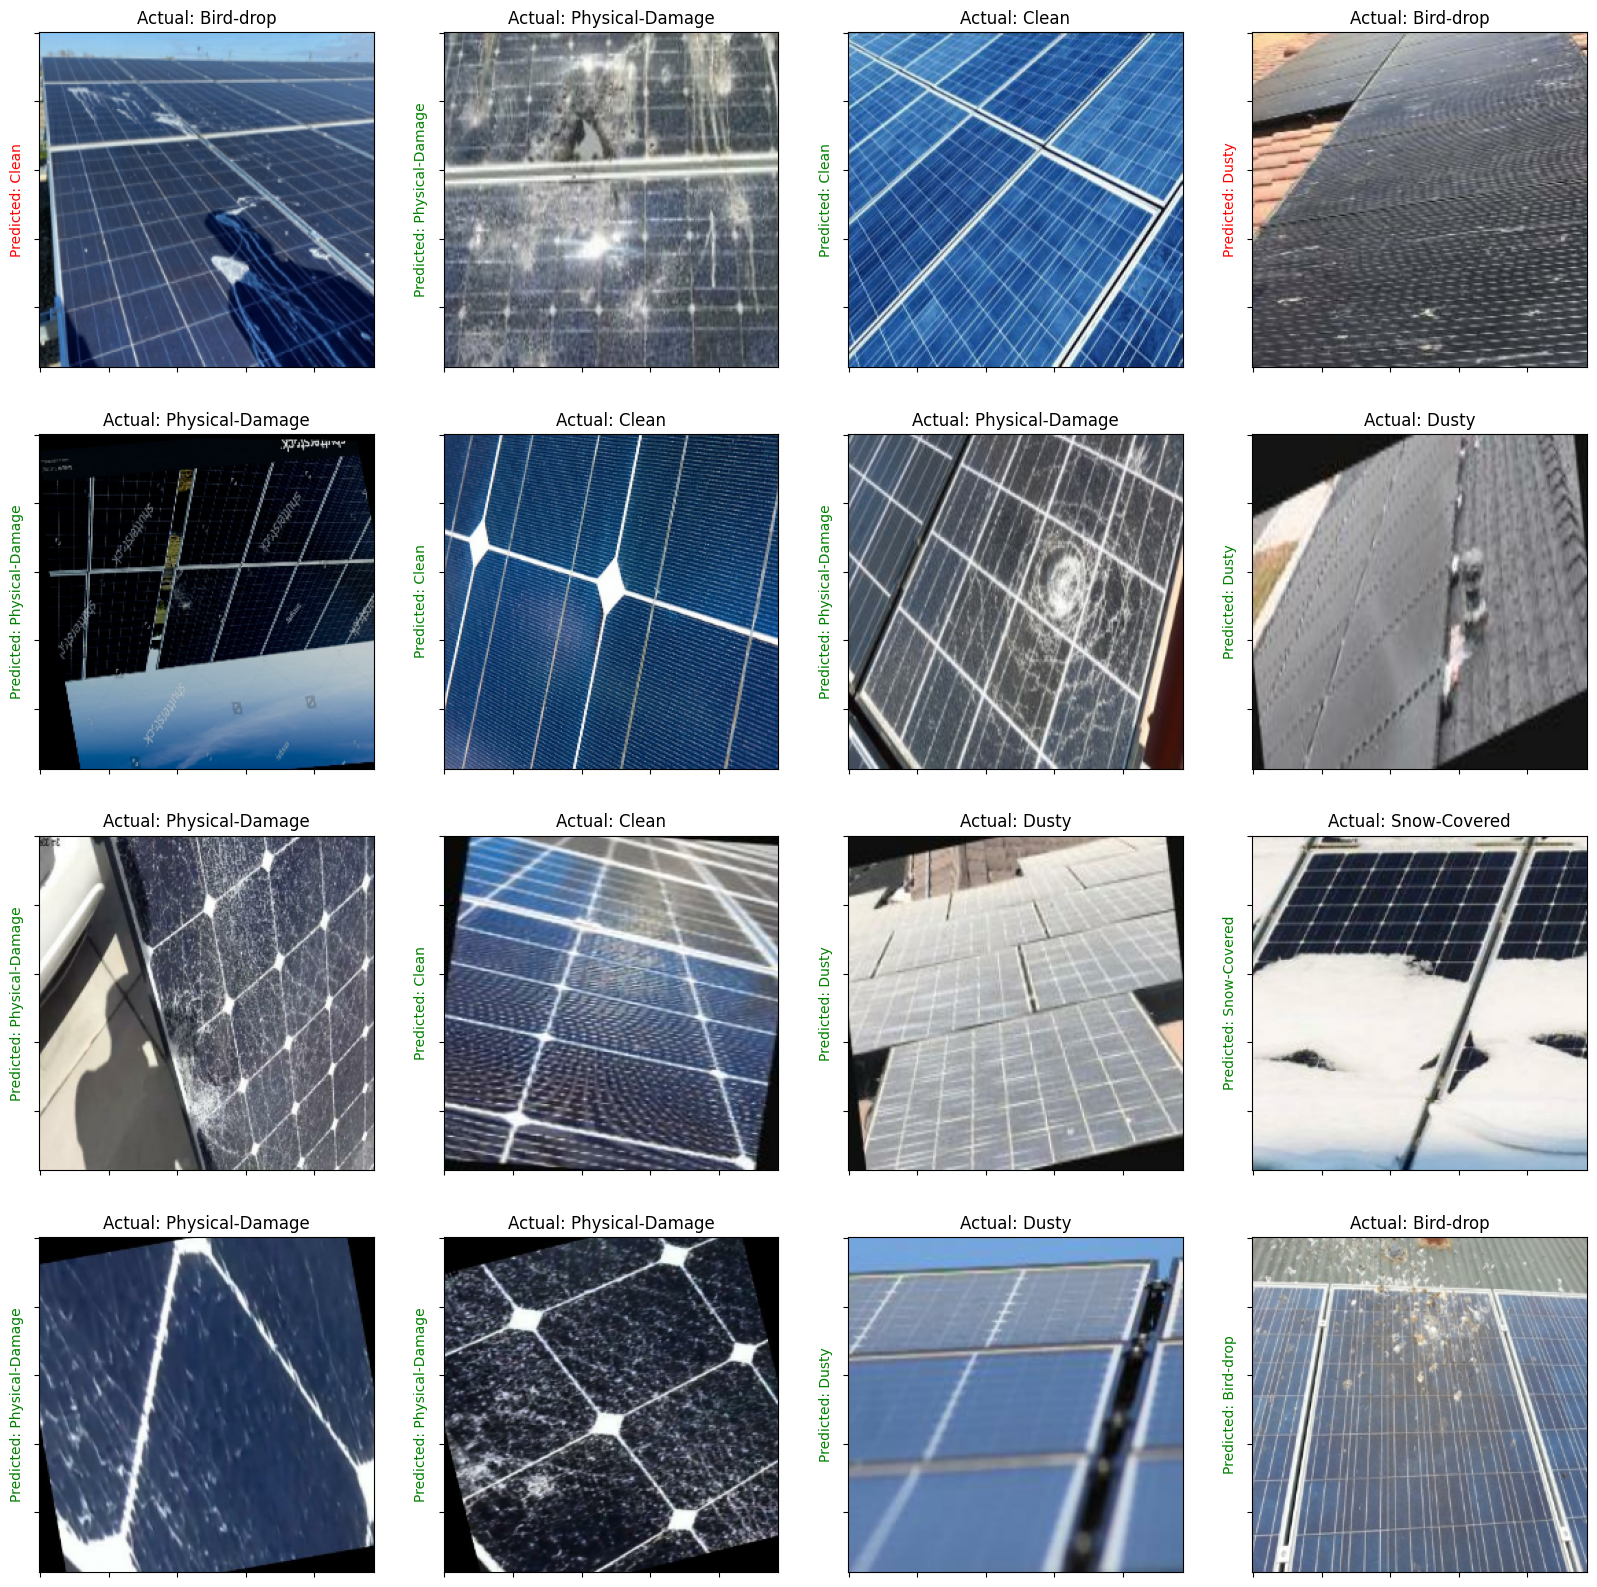

In [10]:
# Visualize predictions
visualize_predictions(model, val_ds, CLASS_NAMES)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


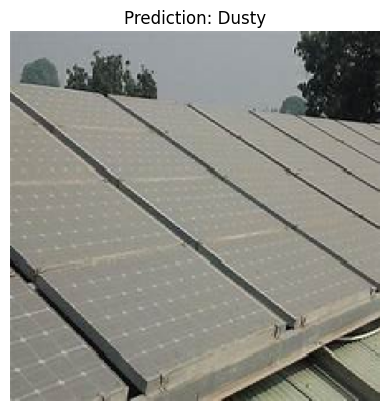

The image belongs to the class: Dusty
Predicted class index: 2
Predicted class label: Dusty


In [11]:
from tensorflow.keras.preprocessing import image
# Predict the class of a specific image
img_path = '/kaggle/input/faults/dust.jpg'  
predicted_class_index = predict_image_class(model, img_path, CLASS_NAMES)

# Print the predicted class
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class label: {CLASS_NAMES[predicted_class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


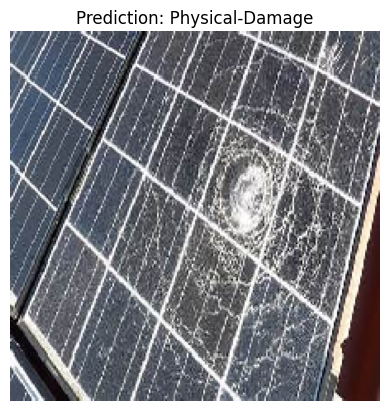

The image belongs to the class: Physical-Damage
Predicted class index: 4
Predicted class label: Physical-Damage


In [12]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/input/shamsoonnewdata/cracked.jpg' 
predicted_class_index = predict_image_class(model, img_path, CLASS_NAMES)

# Print the predicted class
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class label: {CLASS_NAMES[predicted_class_index]}")

In [13]:
# Save the model
model.save('/kaggle/working/solar_panel_mobilenetv2.h5')
print("Model saved.")

Model saved.


# VGG16 Model

In [14]:
# Build the model
model = build_model(IMG_HEIGHT, IMG_WIDTH, len(CLASS_NAMES))
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 244, 244, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 244, 244)       │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 244, 244, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 244, 244, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 512)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 6)              │          3,078 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,717,766 (56.14 MB)

 Trainable params: 3,078 (12.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

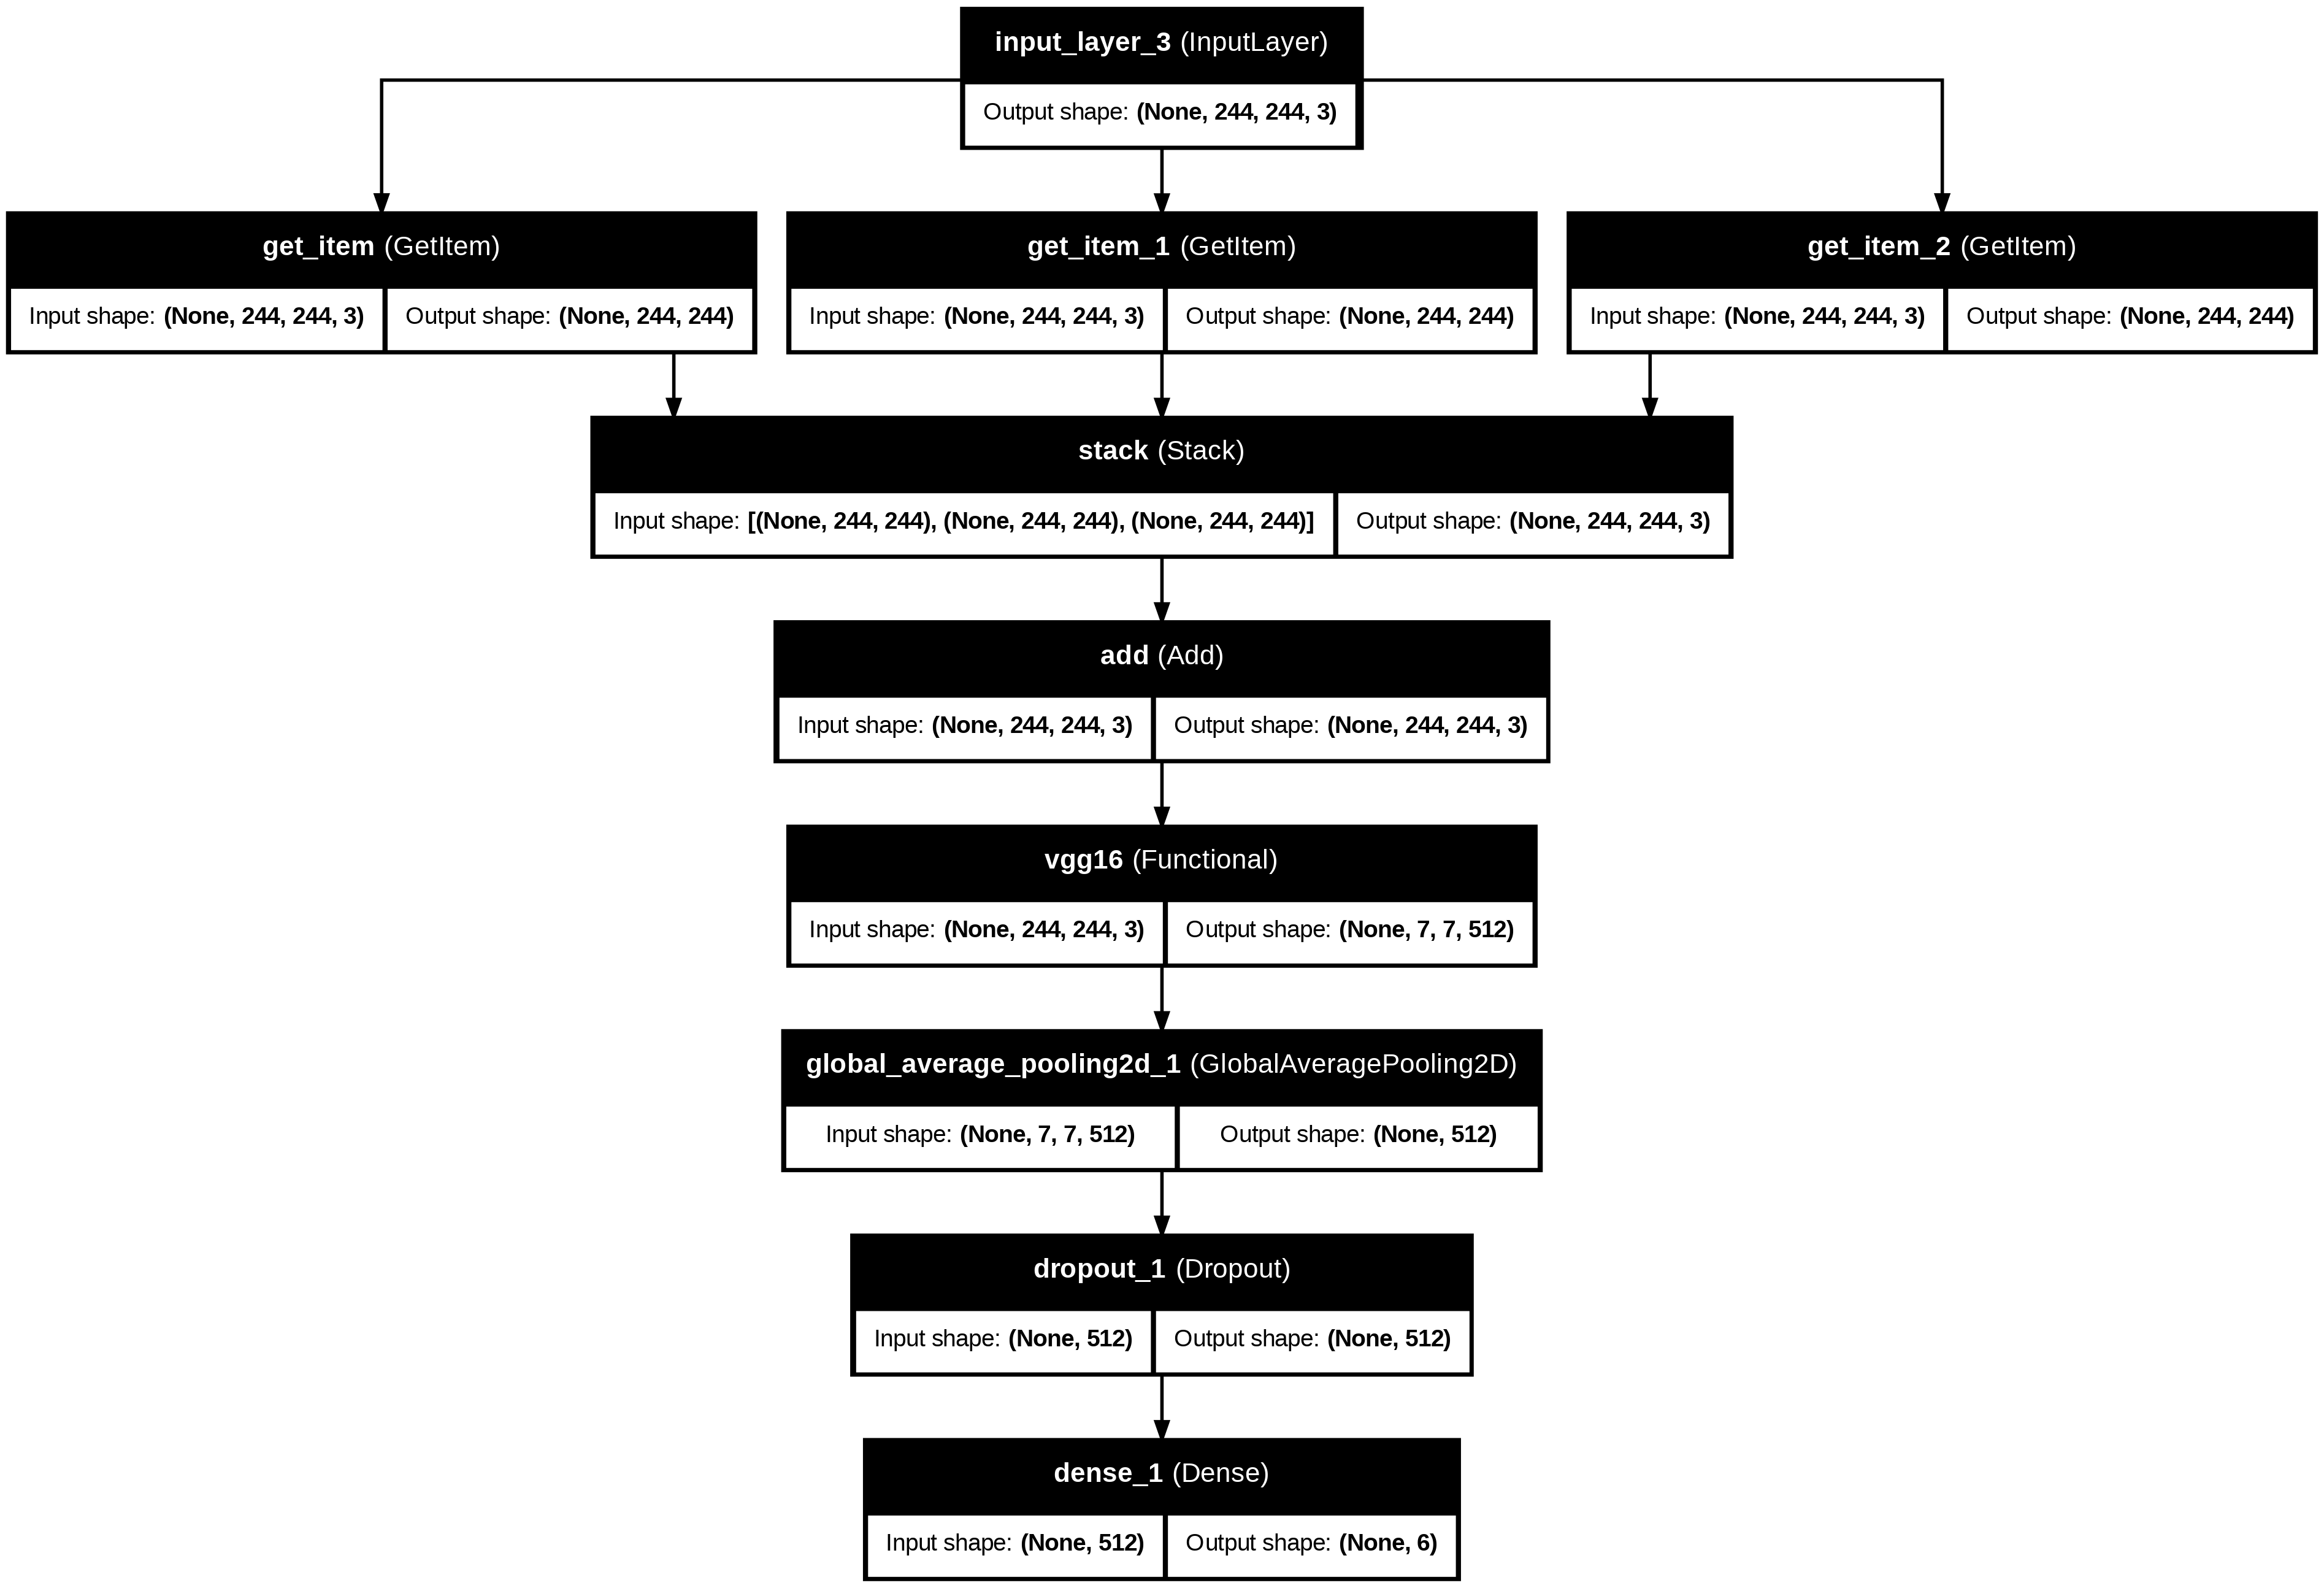

In [15]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture and save it as an image
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
# Train the model
EPOCHS = 15
print("Training the model...")
history = train_model(model, train_ds, val_ds, EPOCHS)

Training the model...
Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.2934 - loss: 5.2989 - val_accuracy: 0.5995 - val_loss: 1.3287
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.5191 - loss: 2.0938 - val_accuracy: 0.7128 - val_loss: 0.8712
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - accuracy: 0.6242 - loss: 1.3146 - val_accuracy: 0.7746 - val_loss: 0.6760
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.6894 - loss: 0.9494 - val_accuracy: 0.7998 - val_loss: 0.6199
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.7266 - loss: 0.8189 - val_accuracy: 0.8272 - val_loss: 0.5494
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - accuracy: 0.7567 - loss: 0.7149 - val_accuracy: 0.8432 - val_loss: 0.5070
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.7727 - loss: 0.6439 - val_accuracy: 0.8410 - val_loss: 0.4908
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - accu

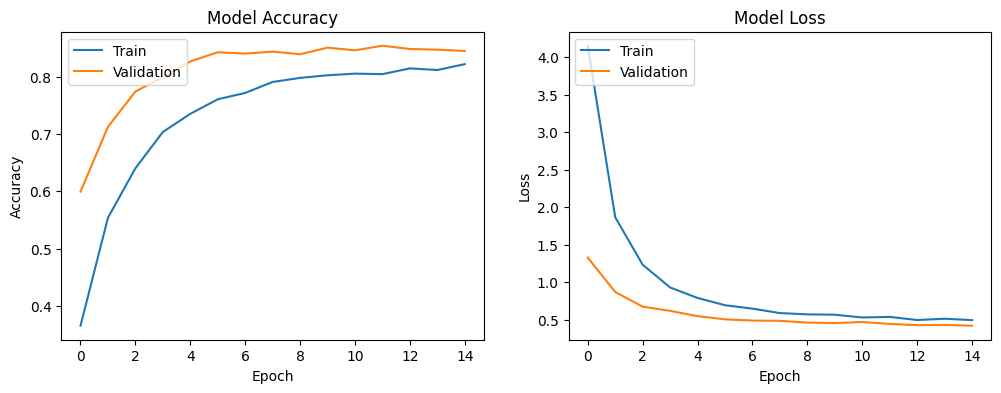

In [17]:
# Plot training history
plot_training_history(history)

In [18]:
# Save the model
model.save('/kaggle/working/solar_panel_fault_classification.h5')
print("Model saved.")

Model saved.


In [19]:
# Evaluate model
evaluate_model(model, val_ds)

28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.8584 - loss: 0.3927
Validation Loss: 0.4294281005859375
Validation Accuracy: 0.8489702343940735


(0.4294281005859375, 0.8489702343940735)

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Fine Tuning:
    </h2>
</div>

In [20]:
from fine_tuning import fine_tune_model
FINE_TUNE_EPOCHS = 10
# Fine-tune the model
fine_tune_history = fine_tune_model(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    base_model_index=1,
    frozen_layers=14,
    learning_rate=0.0001,
    epochs=FINE_TUNE_EPOCHS
)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7618 - loss: 0.7089
Epoch 1: val_loss improved from inf to 0.39936, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 37s 279ms/step - accuracy: 0.7622 - loss: 0.7078 - val_accuracy: 0.8787 - val_loss: 0.3994 - learning_rate: 1.0000e-04
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9227 - loss: 0.2450
Epoch 2: val_loss improved from 0.39936 to 0.22629, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 28s 253ms/step - accuracy: 0.9227 - loss: 0.2449 - val_accuracy: 0.9359 - val_loss: 0.2263 - learning_rate: 1.0000e-04
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9465 - loss: 0.1454
Epoch 3: val_loss improved from 0.22629 to 0.21977, saving model to best_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 28s 254ms/step - accuracy: 0.9466 - loss: 0.1453 - val_accuracy: 0.9405 - val_loss: 0.2198 - learning_rate: 1.0000e-04
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
model.save('/kaggle/working/solar_panel_fault_classification_finetuned.h5')
print("Fine-tuned model saved.")

Fine-tuned model saved.


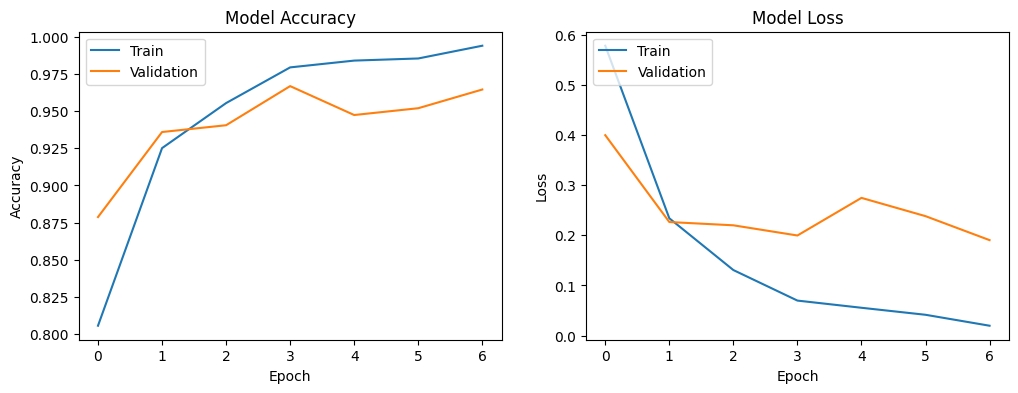

In [22]:
# Plot training history
plot_training_history(fine_tune_history)

In [23]:
# Evaluate model
evaluate_model(model, val_ds)

28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9756 - loss: 0.1578
Validation Loss: 0.19946560263633728
Validation Accuracy: 0.9668192267417908


(0.19946560263633728, 0.9668192267417908)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


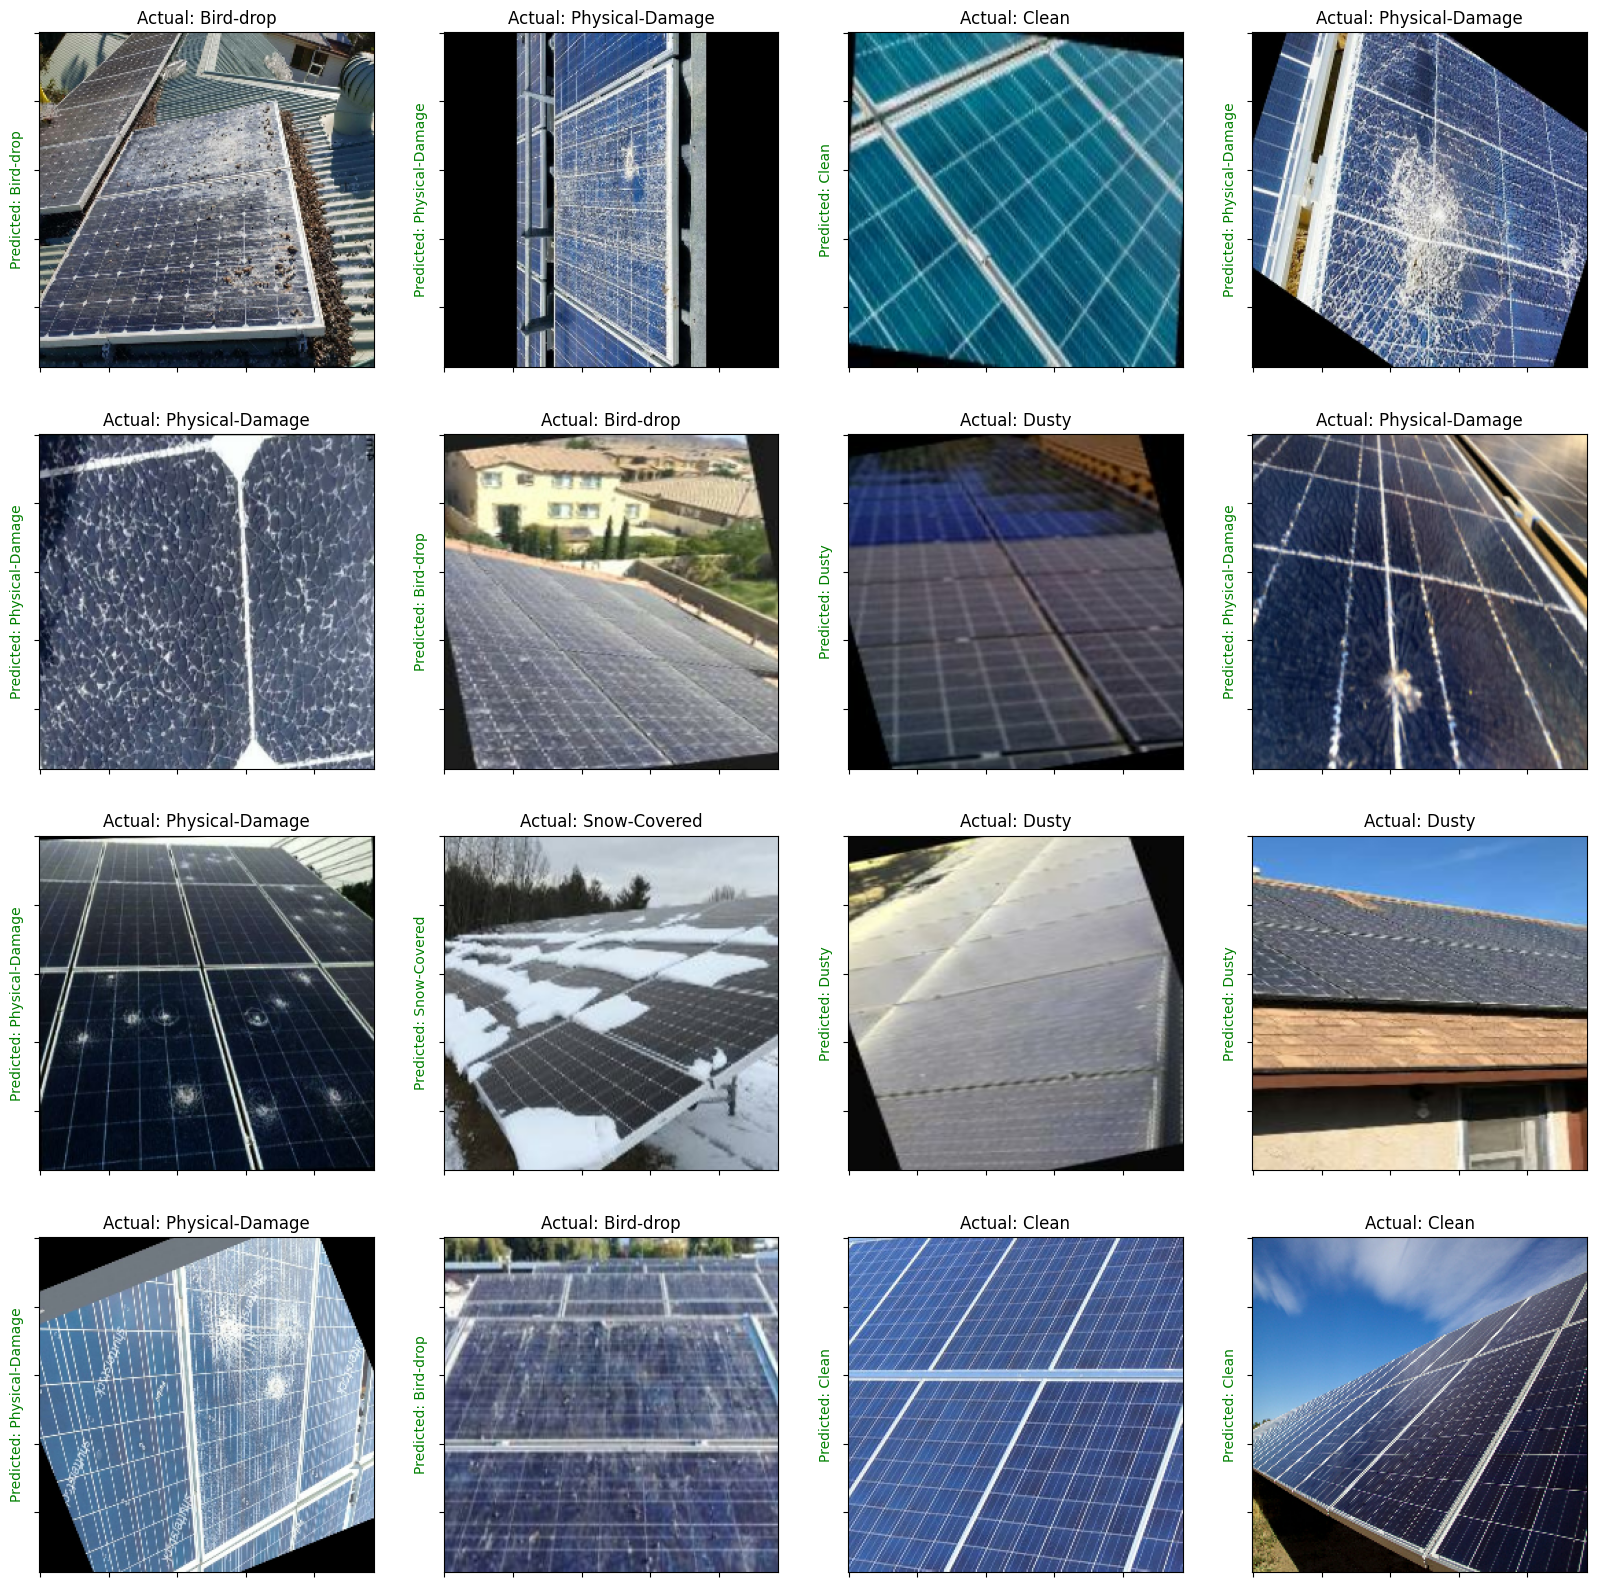

In [24]:
# Visualize predictions
visualize_predictions(model, val_ds, CLASS_NAMES)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


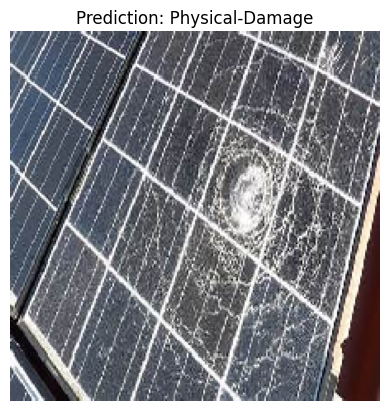

The image belongs to the class: Physical-Damage
Predicted class index: 4
Predicted class label: Physical-Damage


In [25]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/kaggle/input/shamsoonnewdata/cracked.jpg' 
predicted_class_index = predict_image_class(model, img_path, CLASS_NAMES)

# Print the predicted class
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class label: {CLASS_NAMES[predicted_class_index]}")

<div style="background: linear-gradient(to right, #FFEDD5, #FFB84D); padding: 10px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h2 style="font-family: Arial, sans-serif; font-size: 28px; text-align: left; color: #007a5f; margin: 0;">
        Save best model:
    </h2>
</div>

In [26]:
# Load the best model
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

In [27]:
# Evaluate the model
loss, accuracy = best_model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.9617 - loss: 0.2077
Validation Loss: 0.19022758305072784
Validation Accuracy: 0.964530885219574
